[Fashion Mnist Data Set](https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion)

### Librerias

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils

### Cargar datos

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


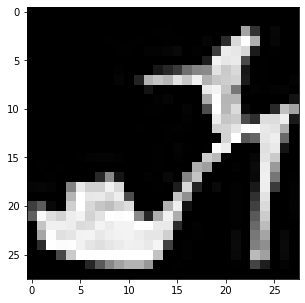

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[9], 'gray')

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

x_train1 = x_train
x_test1 = x_test

x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### Entrenamiento 1er autoencoder

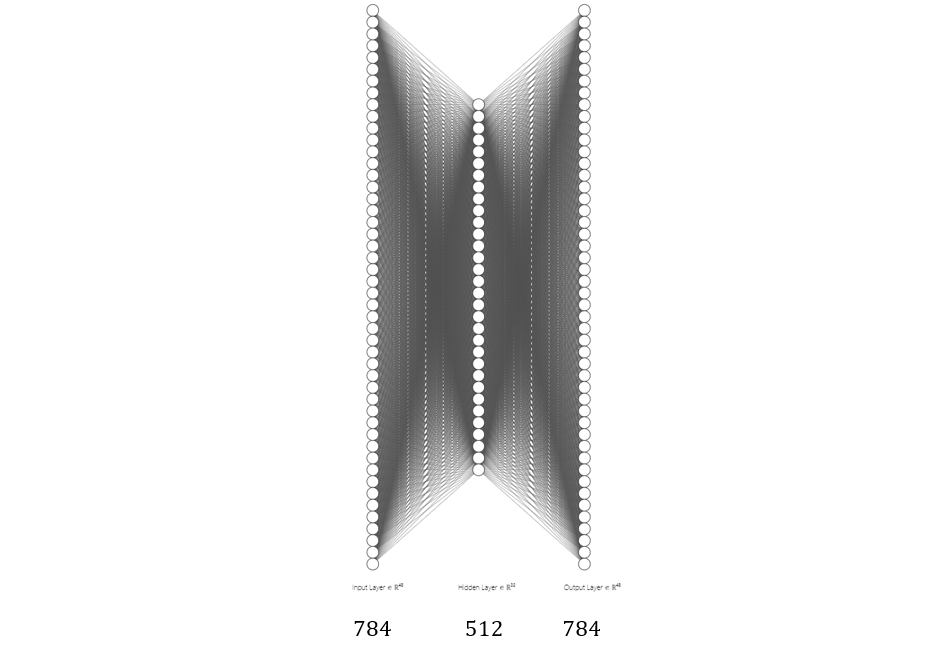

In [ ]:
encoding_dim = 512
input_img = Input(shape=(x_train.shape[1]))
encoded = Dense(encoding_dim, activation='relu', name = 'Latente1')(input_img)
decoded = Dense(x_train.shape[1], activation='sigmoid')(encoded)

autoencoder1 = Model(input_img, decoded)
encoded1 = Model(input_img, encoded)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 Latente1 (Dense)            (None, 512)               401920    
                                                                 
 dense (Dense)               (None, 784)               402192    
                                                                 
Total params: 804,112
Trainable params: 804,112
Non-trainable params: 0
_________________________________________________________________


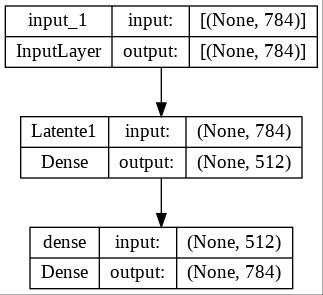

In [ ]:
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder1.summary()
plot_model(autoencoder1, to_file='autoencoder.jpg', show_shapes=True)

In [ ]:
history1 = autoencoder1.fit(x_train,x_train, epochs=400, batch_size=256, shuffle = True, validation_data=(x_test,x_test), verbose=0)

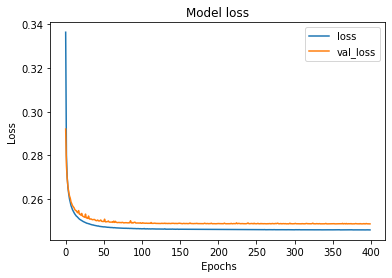

In [ ]:
plt.figure()
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')

plt.title('Model loss')
plt.xlabel(' Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()


### Entrenamiento 2do autoencoder

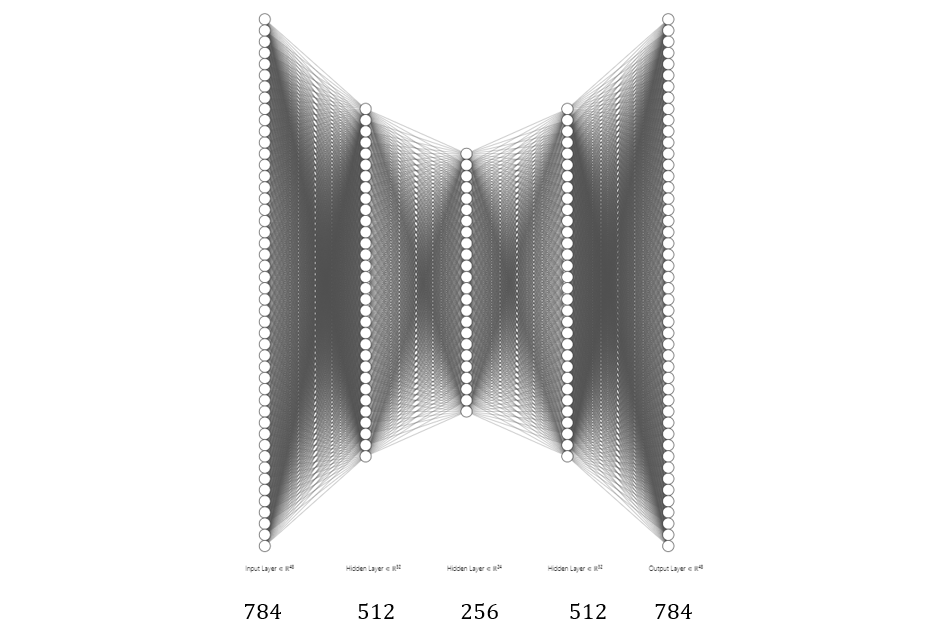

In [ ]:
encoding_dim = 256
input_img = Input(shape=(x_train.shape[1]))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu', name = 'Latente2')(encoded)
decoded = Dense(512, activation='relu')(encoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder2 = Model(input_img, decoded)
encoder2 = Model(input_img, encoded)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 Latente2 (Dense)            (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 784)               402192    
                                                                 
Total params: 1,067,024
Trainable params: 1,067,024
Non-trainable params: 0
_________________________________________________________________


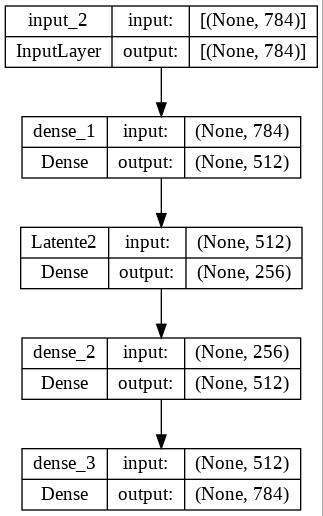

In [ ]:
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder2.summary()
plot_model(autoencoder2, to_file='autoencoder.jpg', show_shapes=True)

In [ ]:
history2 = autoencoder2.fit(x_train,x_train, epochs=400, batch_size=256, shuffle = True, validation_data=(x_test,x_test), verbose=0)

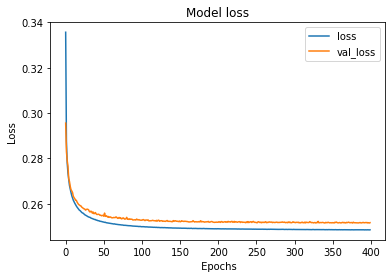

In [ ]:
plt.figure()
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')

plt.title('Model loss')
plt.xlabel(' Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

### Entrenamiento 3er autoencoder

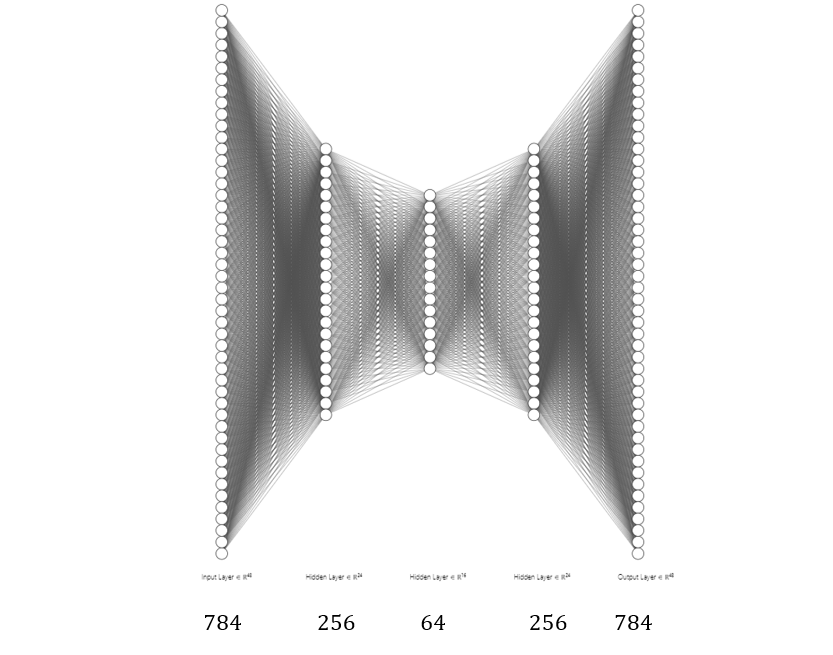

In [ ]:
encoding_dim = 64
input_img = Input(shape=(x_train.shape[1]))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu', name = 'Latente3')(encoded)
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder3 = Model(input_img, decoded)
encoder3 = Model(input_img, encoded)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 Latente3 (Dense)            (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 256)               16640     
                                                                 
 dense_6 (Dense)             (None, 784)               201488    
                                                                 
Total params: 435,536
Trainable params: 435,536
Non-trainable params: 0
_________________________________________________________________


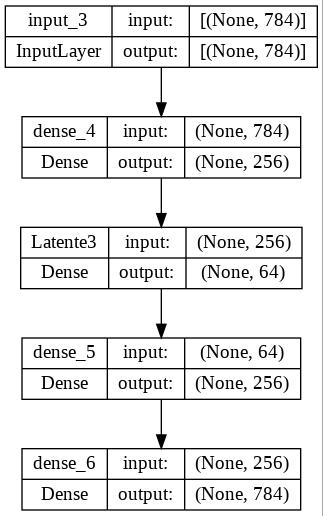

In [ ]:
autoencoder3.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder3.summary()
plot_model(autoencoder3, to_file='autoencoder.jpg', show_shapes=True)

In [ ]:
history3 = autoencoder3.fit(x_train,x_train, epochs=400, batch_size=256, shuffle = True, validation_data=(x_test,x_test), verbose=0)

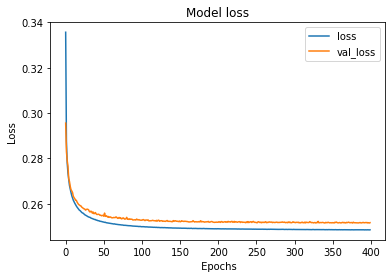

In [ ]:
plt.figure()
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')

plt.title('Model loss')
plt.xlabel(' Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

### Autoencoder apilado

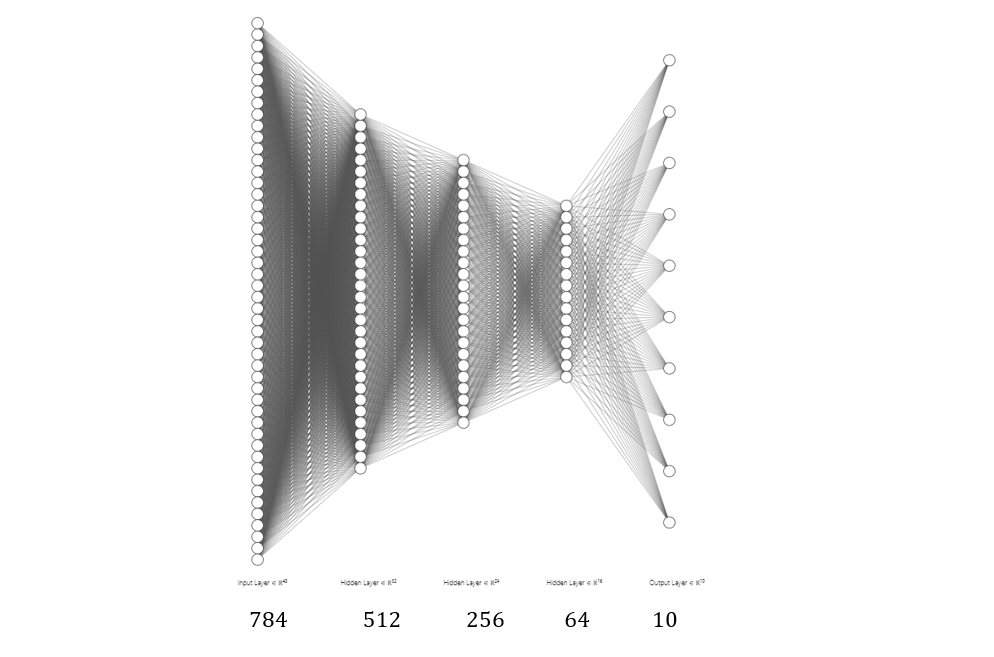

In [ ]:
input = Input(shape=(x_train.shape[1]))
latent1 = autoencoder1.layers[1] (input)
latent2 = autoencoder2.layers[2] (latent1)
latent3 = autoencoder3.layers[2] (latent2)
output = Dense(10, activation='softmax')(latent3)

latent1.trainable = False
latent2.trainable = False
latent3.trainable = False

model = Model(input,output)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 Latente1 (Dense)            (None, 512)               401920    
                                                                 
 Latente2 (Dense)            (None, 256)               131328    
                                                                 
 Latente3 (Dense)            (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 550,346
Trainable params: 550,346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(_, y_train), (_ , y_test) = fashion_mnist.load_data()

print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
y_train1 = y_train
y_test1 = y_test

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history4 = model.fit(x_train,y_train, epochs=400, batch_size=256, shuffle = True, validation_data=(x_test,y_test), verbose=0)

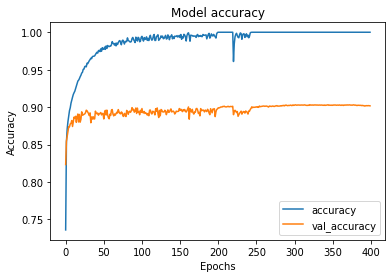

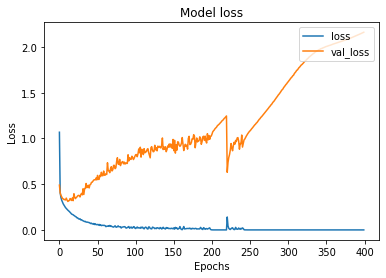

In [ ]:
plt.figure()
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(history4.history['loss'], label='loss')
plt.plot(history4.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

### Matriz de confusion

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[8.6051598e-24 0.0000000e+00 3.3886255e-23 1.3843703e-29 2.0020627e-33
 5.6891043e-21 0.0000000e+00 2.4012330e-26 2.0240423e-31 1.0000000e+00]


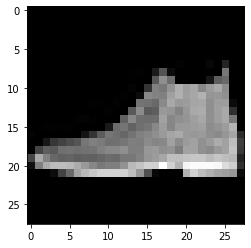

In [ ]:
from sklearn.metrics import confusion_matrix

outputTest = model.predict(x_test)
print(outputTest.shape)
print(y_test[0])
print(outputTest[0])
plt.imshow(x_test1[0],'gray')

In [ ]:
print(np.argmax(outputTest[0]))

9


In [ ]:
cm = confusion_matrix(y_test1,np.argmax(outputTest, axis=1))
print(cm)

[[849   0  16  18   5   1 101   0  10   0]
 [  2 988   1   6   1   0   1   0   1   0]
 [ 18   0 841  13  72   0  54   0   2   0]
 [ 19   3  14 907  30   0  20   0   7   0]
 [  1   1  84  23 838   0  51   0   2   0]
 [  1   0   0   0   0 970   0  17   0  12]
 [115   4  75  24  64   1 706   1  10   0]
 [  0   0   0   0   0  10   0 969   0  21]
 [  2   0   2   4   1   1   2   3 984   1]
 [  0   0   0   0   0   5   1  29   0 965]]


In [ ]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag','Ankle boot']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

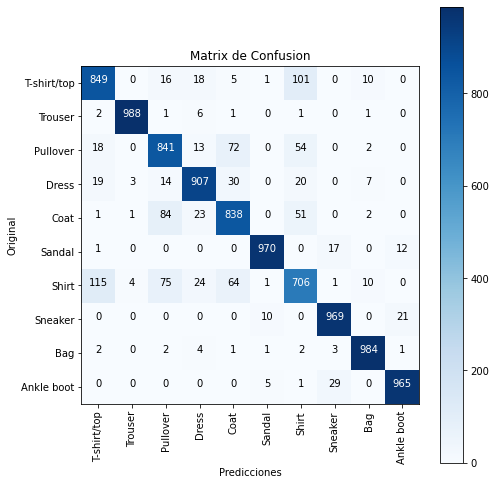

In [ ]:
plot_confusion_matrix(cm, 10)